In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# load data
df = pd.read_csv(r"C:\Users\HP\Desktop\Extion Projects\Predicting Stock Prices Using Sentiment Analysis\all-data.csv",encoding="ISO-8859-1",header=None)

df.columns = ['Sentiment', 'News_Headline']
print(df.head())

  Sentiment                                      News_Headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


Sentiment Distribution:
 Sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13104\4083479031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


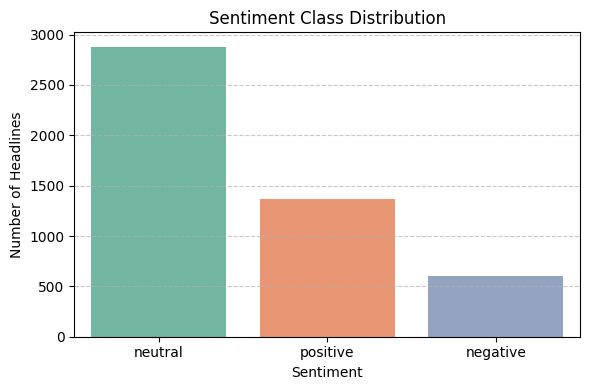

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Headlines")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
total = len(df)
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment.capitalize()} headlines: {count} ({count/total:.2%} of total)")


Neutral headlines: 2879 (59.41% of total)
Positive headlines: 1363 (28.13% of total)
Negative headlines: 604 (12.46% of total)


In [ ]:
# NLP
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [53]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['Cleaned_Headline'] = df['News_Headline'].apply(clean_text)
df[['News_Headline', 'Cleaned_Headline']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,News_Headline,Cleaned_Headline
0,"According to Gran , the company has no plans t...",according gran company plan move production ru...
1,Technopolis plans to develop in stages an area...,technopolis plan develop stage area less squar...
2,The international electronic industry company ...,international electronic industry company elco...
3,With the new production plant the company woul...,new production plant company would increase ca...
4,According to the company 's updated strategy f...,according company updated strategy year baswar...


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Initialize the Tf-idf Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['Cleaned_Headline']).toarray()


In [ ]:
le = LabelEncoder()

y = le.fit_transform(df['Sentiment'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}


In [ ]:
# LOGISTIC REGRESSION 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.734020618556701

Classification Report:

              precision    recall  f1-score   support

    negative       0.75      0.45      0.56       121
     neutral       0.74      0.93      0.82       576
    positive       0.71      0.46      0.56       273

    accuracy                           0.73       970
   macro avg       0.73      0.61      0.65       970
weighted avg       0.73      0.73      0.71       970



In [ ]:
#RANDOMFOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("📊 Random Forest Classification Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


📊 Random Forest Classification Results
Accuracy: 0.7360824742268042
Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.41      0.53       121
     neutral       0.74      0.93      0.83       576
    positive       0.70      0.47      0.56       273

    accuracy                           0.74       970
   macro avg       0.73      0.60      0.64       970
weighted avg       0.73      0.74      0.72       970



Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.45      0.56       121
     neutral       0.74      0.93      0.82       576
    positive       0.71      0.46      0.56       273

    accuracy                           0.73       970
   macro avg       0.73      0.61      0.65       970
weighted avg       0.73      0.73      0.71       970



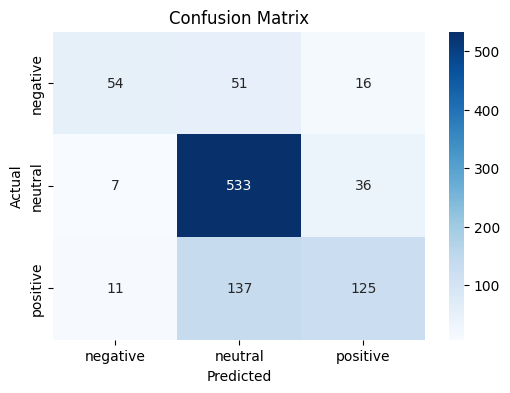

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_mapping.keys()))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
stock_df = yf.download("TSLA", start="2007-01-01", end="2015-01-01")  
stock_df.reset_index(inplace=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
stock_df = stock_df[['Date', 'Close']]  

C:\Users\HP\AppData\Local\Temp\ipykernel_13104\2287174602.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download("TSLA", start="2007-01-01", end="2015-01-01")  # Adjust dates as needed
[*********************100%***********************]  1 of 1 completed


In [31]:
print(df.columns)


Index(['Sentiment', 'News_Headline', 'Cleaned_Headline', 'Sentiment_Score'], dtype='object')


In [33]:
df['Date'] = pd.date_range(start='2007-01-01', periods=len(df)).date

sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_map)


In [34]:
print(df[['Date', 'News_Headline']].head())

         Date                                      News_Headline
0  2007-01-01  According to Gran , the company has no plans t...
1  2007-01-02  Technopolis plans to develop in stages an area...
2  2007-01-03  The international electronic industry company ...
3  2007-01-04  With the new production plant the company woul...
4  2007-01-05  According to the company 's updated strategy f...


In [ ]:
# Group by date and compute average sentiment
daily_sentiment = df.groupby('Date')['Sentiment_Score'].mean().reset_index()

print(daily_sentiment.head())


         Date  Sentiment_Score
0  2007-01-01              0.0
1  2007-01-02              0.0
2  2007-01-03             -1.0
3  2007-01-04              1.0
4  2007-01-05              1.0


In [ ]:
stock_df = yf.download("TSLA", start="2007-01-01", end="2015-01-01", auto_adjust=False)

stock_df.columns = [col[0] for col in stock_df.columns]
stock_df = stock_df.reset_index()
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

merged_df = pd.merge(stock_df, daily_sentiment, on='Date', how='inner')

print(merged_df.head())


[*********************100%***********************]  1 of 1 completed

         Date  Adj Close     Close      High       Low      Open     Volume  \
0  2010-06-29   1.592667  1.592667  1.666667  1.169333  1.266667  281494500   
1  2010-06-30   1.588667  1.588667  2.028000  1.553333  1.719333  257806500   
2  2010-07-01   1.464000  1.464000  1.728000  1.351333  1.666667  123282000   
3  2010-07-02   1.280000  1.280000  1.540000  1.247333  1.533333   77097000   
4  2010-07-06   1.074000  1.074000  1.333333  1.055333  1.333333  103003500   

   Sentiment_Score  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              1.0  


In [ ]:
#LinearRegression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = merged_df[['Sentiment_Score']] 
y = merged_df['Close']              


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.11872821875004935
MSE: 25.916349805097678


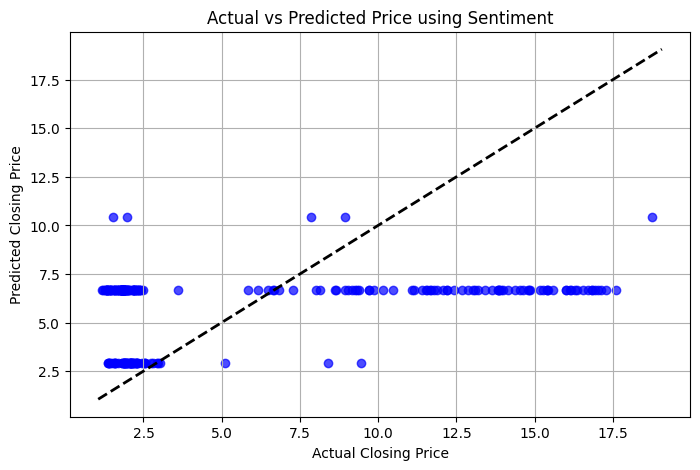

In [44]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs Predicted Price using Sentiment')
plt.grid(True)
plt.show()


In [ ]:
#RandomForestREgressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
merged_df['Prev_Close'] = merged_df['Close'].shift(1)
merged_df['Prev_Sentiment'] = merged_df['Sentiment_Score'].shift(1)

merged_df.dropna(inplace=True)

X = merged_df[['Prev_Close', 'Prev_Sentiment']]
y = merged_df['Close']


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [49]:
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("MSE:", mse)


R² Score: 0.9975133646782343
MSE: 0.06832590031709283


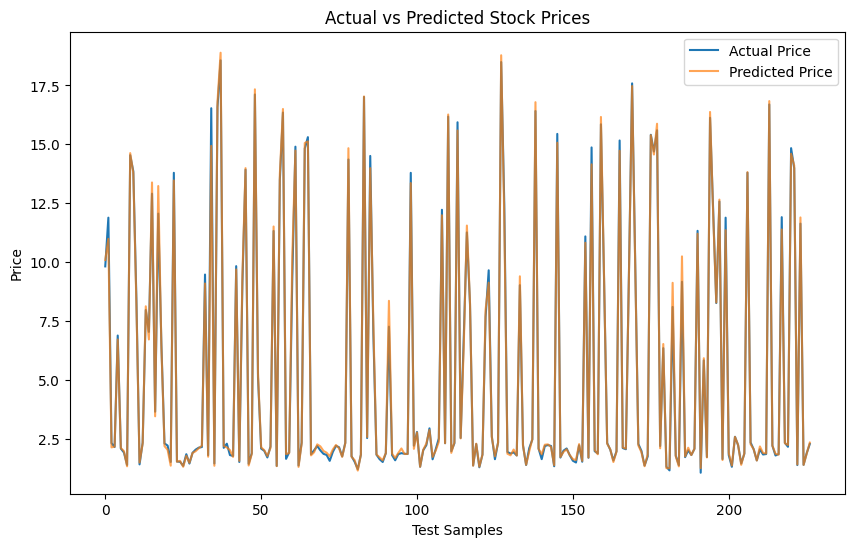

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Test Samples')
plt.ylabel('Price')
plt.legend()
plt.show()


In [51]:
import joblib
joblib.dump(rf_model, 'random_forest_stock_model.pkl')


['random_forest_stock_model.pkl']